# Challenge 5

## Reading Materials

### Required Reading


## Activity 1
Due: September 6, 2018

In Activity 1, you are tasked with building a binary classifier based on SVM.
Each student has their own files, and should work in place.
```python
student_identity = 'netid'
training = '5challenge_training_' + student_identity + '.csv'
testing = '5challenge_testing_' + student_identity + '.csv'
```

### Deliverables
 1. Fill column ```Class``` in the testing file.
 2. Commit your change on Git.
 3. Describe the Kernel you used for your SVM. Plot the decision region juxtaposed with the training set.


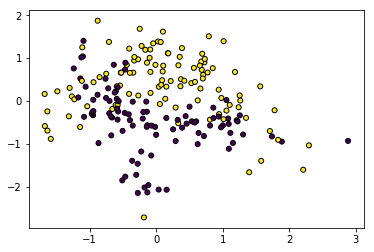

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import svm


student_identity = 'jkam273'

filenameToRead = '5challenge_training_' + student_identity + '.csv'
training_df = pd.read_csv('C:/Users/jatin/Desktop/latest/ECEN689-Fall2018/Challenges/5Files/' + filenameToRead)
testing_df = pd.read_csv('C:/Users/jatin/Desktop/latest/ECEN689-Fall2018/Challenges/5Files/' + '5challenge_testing_jkam273.csv')

# print(training_df.head())

x1 = training_df[['Feature 0', 'Feature 1']].values
y1 = training_df[['Class']].values
# print(X1,Y1)
plt.scatter(x1[:, 0], x1[:, 1], marker='o', c=y1.ravel(),
            s=25, edgecolor='k')
plt.show()
# clf.predict(testing_df)


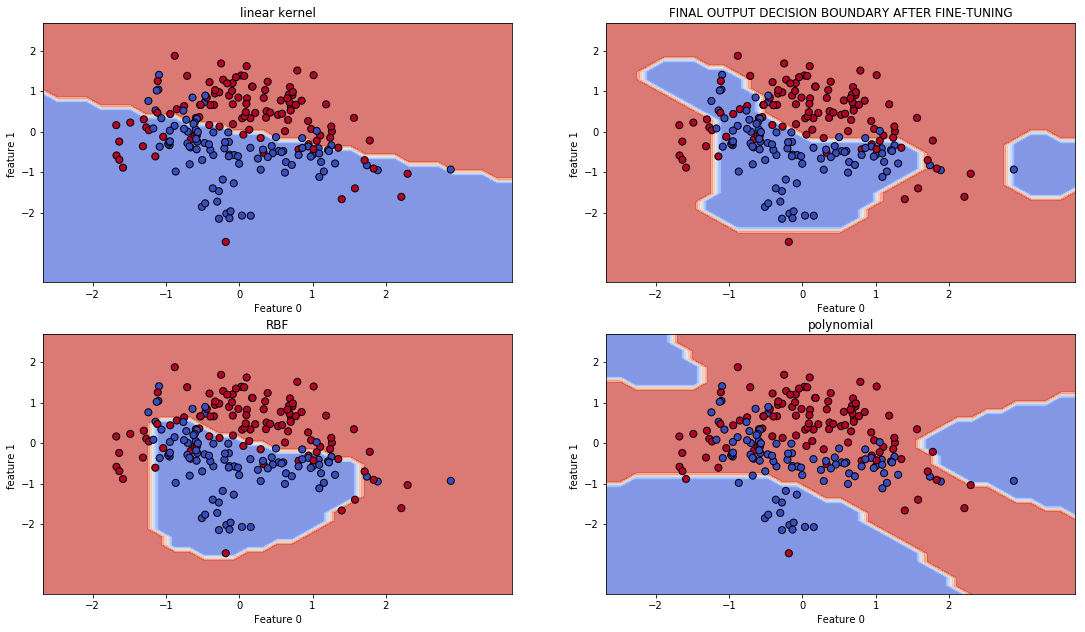

In [74]:
def make_meshgrid(x, y, h=.2):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

X = x1
y = y1.ravel()


C = 3  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          # plotting training data and decision boundary with the final kernel parameters of RBF
          svm.SVC(kernel='rbf',gamma = 1.2,C = 1.8),
          svm.SVC(kernel='rbf'),
          svm.SVC(kernel='poly'))
         
                  
models = [clf.fit(X, y) for clf in models]
scores = [clf.score(X,y) for clf in models]


# title for the plots
titles = ('linear kernel',
          'FINAL OUTPUT DECISION BOUNDARY AFTER FINE-TUNING',
          'RBF',
          'polynomial')

### code to plot the scatter plot with decision boundary ###########################3
fig, sub = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
#     plot_contours(ax, clf, xx, yy,
#                   cmap=plt.cm.coolwarm, alpha=0.8)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z,cmap=plt.cm.coolwarm, alpha=0.7)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('feature 1 ')
    ax.set_xticks([i for i in range(-2,3)])
    ax.set_yticks([i for i in range(-2,3)])
    ax.set_title(title)

plt.show()



## I used 3 kernels above, with default parameters, and with the default parameters, RBF outperformed others and showed a training score of 82.5 %
## It is also worth observing that from the scatter plot, it was evident that its not a linear decision boundary between the two classes, so either of the polynomial or RBF function should be used as the kernels. 
## Next, i will try to tune RBF function so that it gives better training accuracy

In [73]:
print(scores)

[0.775, 0.86, 0.825, 0.58]


## When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

### - The above is taken from the sklearn documentation page of SVM classifier

In [62]:
svm_classifier_rbf = svm.SVC(kernel = 'rbf')
svm_classifier_rbf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
list_c_values =np.linspace(0.1,10,100)
list_gamma_values=np.linspace(0.1,10,10)
hyper_params = [{'C': list_c_values, 'gamma':list_gamma_values}]
scoring_array = ['accuracy','f1','average_precision']
all_scoring_kernel_hyperparameters = []
for i in scoring_array:
    optimising = GridSearchCV(estimator = svm_classifier_rbf,
                               param_grid = hyper_params,
                               scoring = i,
                               cv = None)
    fit = optimising.fit(X, y)
    all_scoring_kernel_hyperparameters.append([fit.best_score_,fit.best_params_,i])   
    
    
print(all_scoring_kernel_hyperparameters)

[[0.845, {'C': 2.8000000000000003, 'gamma': 1.2000000000000002}, 'accuracy'], [0.8434096109839817, {'C': 0.1, 'gamma': 4.5}, 'f1'], [0.9340369010383113, {'C': 1.8000000000000003, 'gamma': 1.2000000000000002}, 'average_precision']]


## The deafult parameters gave 82% accuracy on training data, but when fine tuned the hyper parameters , with average precision scoring, we get the tuned gamma and C values.
## Next I'll use these parameters to check if the scoring has actually increased, and then i'll use this to predict the given test data.

In [66]:
svm_classifier_rbf = svm.SVC(kernel = 'rbf',C=1.8,gamma = 1.2)
svm_classifier_rbf.fit(X,y)
svm_classifier_rbf.score(X,y)

0.86

### As we see the scoring has now increased by 4% . This verifies that the parameters are now tuned

In [67]:
testing_data = testing_df.iloc[:,2:]

In [68]:
testing_df['Class'] = svm_classifier_rbf.predict(testing_data)

In [69]:
testing_df = testing_df.iloc[:,1:]

In [70]:
testing_df.head()

,Class,Feature 0,Feature 1
0,0,1.501527,-0.725404
1,1,1.521296,0.119152
2,0,-1.158432,-0.106133
3,0,-0.425882,-0.161423
4,1,0.830658,1.177038


In [75]:
testing_df.to_csv('C:/Users/jatin/Desktop/latest/ECEN689-Fall2018/Challenges/5Files/predictions_challenge5.csv')